집값예측 (SD아카데미 프로젝트)
--

참고링크:

개별공시지가 정보

http://openapi.nsdi.go.kr/nsdi/eios/ServiceDetail.do?svcSe=F&svcId=F012&provOrg=NIDO


시군구별 이동건수

https://kosis.kr/statHtml/statHtml.do?orgId=101&tblId=DT_1B26007&vw_cd=MT_ZTITLE&list_id=A34_2&seqNo=&lang_mode=ko&language=kor&obj_var_id=&itm_id=&conn_path=MT_ZTITLE


서울시 인구이동 (구별/월별) 통계

http://data.seoul.go.kr/dataList/429/S/2/datasetView.do


한국부동산원_지가지수

https://www.data.go.kr/data/15043980/fileData.do


부동산 월별 관련 데이터


https://www.data.go.kr/tcs/dss/selectDataSetList.do?dType=FILE&keyword=%EC%9B%94%EB%B3%84&detailKeyword=&publicDataPk=&recmSe=N&detailText=&relatedKeyword=&commaNotInData=&commaAndData=&commaOrData=&must_not=&tabId=&dataSetCoreTf=&coreDataNm=&sort=&relRadio=&orgFullName=&orgFilter=&org=&orgSearch=&currentPage=12&perPage=10&brm=&instt=&svcType=&kwrdArray=&extsn=&coreDataNmArray=&pblonsipScopeCode=


In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

move=pd.read_csv('C:/Users/sundooedu/Desktop/빅데이터분석수업자료/프로젝트/주제 후보 데이터파일 모음/집값예측/시군구별_이동건수_20210608095035.csv', engine='python')
rate=pd.read_csv('C:/Users/sundooedu/Desktop/빅데이터분석수업자료/프로젝트/주제 후보 데이터파일 모음/집값예측/한국부동산원_지가변동율(월별, 지역별)_20201014.csv', engine='python')
index=pd.read_csv('C:/Users/sundooedu/Desktop/빅데이터분석수업자료/프로젝트/주제 후보 데이터파일 모음/집값예측/한국부동산원_지가지수(월별, 지역별)_20201014.csv', engine='python')

In [2]:
move=pd.DataFrame(move)
rate=pd.DataFrame(rate)
index=pd.DataFrame(index)

move == 시군구별_이동건수_20210608095035
--

In [3]:
move.head()

,행정구역(시군구)별,이동규모별,2021. 02,2021. 02.1,2021. 02.2,2021. 02.3,2021. 02.4,2021. 02.5,2021. 02.6,2021. 02.7,...,2021. 03.6,2021. 03.7,2021. 04,2021. 04.1,2021. 04.2,2021. 04.3,2021. 04.4,2021. 04.5,2021. 04.6,2021. 04.7
0,행정구역(시군구)별,이동규모별,총전입 (건),총전출 (건),순이동 (건),시도내-시군구내이동 (건),시도내-시군구간전입 (건),시도내-시군구간전출 (건),시도간전입 (건),시도간전출 (건),...,시도간전입 (건),시도간전출 (건),총전입 (건),총전출 (건),순이동 (건),시도내-시군구내이동 (건),시도내-시군구간전입 (건),시도내-시군구간전출 (건),시도간전입 (건),시도간전출 (건)
1,전국,계,463863,463863,0,138370,139023,139023,186470,186470,...,206430,206430,414794,414794,0,136390,123149,123149,155255,155255
2,전국,1인,339918,339918,0,86755,101072,101072,152091,152091,...,176262,176262,315647,315647,0,88980,94520,94520,132147,132147
3,전국,2인,50857,50857,0,19875,15434,15434,15548,15548,...,16584,16584,47877,47877,0,20666,14126,14126,13085,13085
4,전국,3인,36513,36513,0,15246,11514,11514,9753,9753,...,8020,8020,28430,28430,0,14100,8363,8363,5967,5967


rate == 한국부동산원_지가변동율(월별, 지역별)_20201014
--

In [4]:
rate.head()

,지역,2016-01(변동률),2016-01(누계),2016-02(변동률),2016-02(누계),2016-03(변동률),2016-03(누계),2016-04(변동률),2016-04(누계),2016-05(변동률),...,2020-04(변동률),2020-04(누계),2020-05(변동률),2020-05(누계),2020-06(변동률),2020-06(누계),2020-07(변동률),2020-07(누계),2020-08(변동률),2020-08(누계)
0,전국,0.173,0.173,0.17,0.343,0.216,0.56,0.214,0.775,0.221,...,0.236,1.161,0.257,1.421,0.299,1.724,0.332,2.062,0.312,2.38
1,수도권,0.135,0.135,0.141,0.276,0.184,0.46,0.197,0.659,0.213,...,0.296,1.446,0.316,1.767,0.355,2.128,0.381,2.517,0.358,2.885
2,지방,0.241,0.241,0.223,0.464,0.271,0.736,0.243,0.981,0.236,...,0.129,0.664,0.154,0.819,0.2,1.02,0.248,1.271,0.227,1.501
3,대도시,0.197,0.197,0.189,0.387,0.227,0.615,0.237,0.854,0.253,...,0.275,1.387,0.3,1.692,0.345,2.042,0.405,2.456,0.388,2.854
4,시지역,0.153,0.153,0.154,0.307,0.205,0.513,0.195,0.708,0.192,...,0.205,0.981,0.224,1.207,0.265,1.475,0.273,1.753,0.245,2.002


In [5]:
index.head()

,지 역,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08,2016-09,...,2019-11,2019-12,2020-01,2020-02,2020-03,2020-04,2020-05,2020-06,2020-07,2020-08
0,전국,97.752,97.918,98.130,98.340,98.557,98.799,99.040,99.272,99.507,...,112.761,113.139,113.514,113.878,114.184,114.453,114.747,115.090,115.472,115.832
1,수도권,97.858,97.996,98.176,98.370,98.579,98.817,99.059,99.288,99.521,...,114.091,114.563,115.029,115.484,115.877,116.220,116.587,117.001,117.447,117.868
2,지방,97.567,97.785,98.049,98.287,98.519,98.769,99.008,99.246,99.485,...,110.517,110.738,110.960,111.171,111.329,111.473,111.645,111.868,112.145,112.400
3,대도시,97.499,97.684,97.906,98.138,98.387,98.657,98.932,99.193,99.457,...,115.085,115.571,116.046,116.495,116.853,117.174,117.526,117.931,118.409,118.869
4,시지역,97.952,98.103,98.304,98.495,98.685,98.907,99.122,99.332,99.546,...,110.806,111.095,111.389,111.687,111.956,112.185,112.436,112.734,113.042,113.319


In [6]:
move.columns

Index(['행정구역(시군구)별', '이동규모별', '2021. 02', '2021. 02.1', '2021. 02.2',
       '2021. 02.3', '2021. 02.4', '2021. 02.5', '2021. 02.6', '2021. 02.7',
       '2021. 03', '2021. 03.1', '2021. 03.2', '2021. 03.3', '2021. 03.4',
       '2021. 03.5', '2021. 03.6', '2021. 03.7', '2021. 04', '2021. 04.1',
       '2021. 04.2', '2021. 04.3', '2021. 04.4', '2021. 04.5', '2021. 04.6',
       '2021. 04.7'],
      dtype='object')

In [7]:
rate.columns

Index(['지역', '2016-01(변동률)', '2016-01(누계)', '2016-02(변동률)', '2016-02(누계)',
       '2016-03(변동률)', '2016-03(누계)', '2016-04(변동률)', '2016-04(누계)',
       '2016-05(변동률)',
       ...
       '2020-04(변동률)', '2020-04(누계)', '2020-05(변동률)', '2020-05(누계)',
       '2020-06(변동률)', '2020-06(누계)', '2020-07(변동률)', '2020-07(누계)',
       '2020-08(변동률)', '2020-08(누계)'],
      dtype='object', length=113)

In [8]:
index.columns

Index(['지 역', '2016-01', '2016-02', '2016-03', '2016-04', '2016-05', '2016-06',
       '2016-07', '2016-08', '2016-09', '2016-10', '2016-11', '2016-12',
       '2017-01', '2017-02', '2017-03', '2017-04', '2017-05', '2017-06',
       '2017-07', '2017-08', '2017-09', '2017-10', '2017-11', '2017-12',
       '2018-01', '2018-02', '2018-03', '2018-04', '2018-05', '2018-06',
       '2018-07', '2018-08', '2018-09', '2018-10', '2018-11', '2018-12',
       '2019-01', '2019-02', '2019-03', '2019-04', '2019-05', '2019-06',
       '2019-07', '2019-08', '2019-09', '2019-10', '2019-11', '2019-12',
       '2020-01', '2020-02', '2020-03', '2020-04', '2020-05', '2020-06',
       '2020-07', '2020-08'],
      dtype='object')

In [9]:
move

,행정구역(시군구)별,이동규모별,2021. 02,2021. 02.1,2021. 02.2,2021. 02.3,2021. 02.4,2021. 02.5,2021. 02.6,2021. 02.7,...,2021. 03.6,2021. 03.7,2021. 04,2021. 04.1,2021. 04.2,2021. 04.3,2021. 04.4,2021. 04.5,2021. 04.6,2021. 04.7
0,행정구역(시군구)별,이동규모별,총전입 (건),총전출 (건),순이동 (건),시도내-시군구내이동 (건),시도내-시군구간전입 (건),시도내-시군구간전출 (건),시도간전입 (건),시도간전출 (건),...,시도간전입 (건),시도간전출 (건),총전입 (건),총전출 (건),순이동 (건),시도내-시군구내이동 (건),시도내-시군구간전입 (건),시도내-시군구간전출 (건),시도간전입 (건),시도간전출 (건)
1,전국,계,463863,463863,0,138370,139023,139023,186470,186470,...,206430,206430,414794,414794,0,136390,123149,123149,155255,155255
2,전국,1인,339918,339918,0,86755,101072,101072,152091,152091,...,176262,176262,315647,315647,0,88980,94520,94520,132147,132147
3,전국,2인,50857,50857,0,19875,15434,15434,15548,15548,...,16584,16584,47877,47877,0,20666,14126,14126,13085,13085
4,전국,3인,36513,36513,0,15246,11514,11514,9753,9753,...,8020,8020,28430,28430,0,14100,8363,8363,5967,5967
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,제주특별자치도,6인,15,14,1,9,2,2,4,3,...,0,1,9,7,2,5,2,2,2,0
195,제주특별자치도,7인,5,6,-1,5,0,0,0,1,...,1,0,2,2,0,1,0,0,1,1
196,제주특별자치도,8인,0,0,0,0,0,0,0,0,...,0,1,1,1,0,1,0,0,0,0
197,제주특별자치도,9인,1,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
rate

,지역,2016-01(변동률),2016-01(누계),2016-02(변동률),2016-02(누계),2016-03(변동률),2016-03(누계),2016-04(변동률),2016-04(누계),2016-05(변동률),...,2020-04(변동률),2020-04(누계),2020-05(변동률),2020-05(누계),2020-06(변동률),2020-06(누계),2020-07(변동률),2020-07(누계),2020-08(변동률),2020-08(누계)
0,전국,0.173,0.173,0.17,0.343,0.216,0.56,0.214,0.775,0.221,...,0.236,1.161,0.257,1.421,0.299,1.724,0.332,2.062,0.312,2.38
1,수도권,0.135,0.135,0.141,0.276,0.184,0.46,0.197,0.659,0.213,...,0.296,1.446,0.316,1.767,0.355,2.128,0.381,2.517,0.358,2.885
2,지방,0.241,0.241,0.223,0.464,0.271,0.736,0.243,0.981,0.236,...,0.129,0.664,0.154,0.819,0.2,1.02,0.248,1.271,0.227,1.501
3,대도시,0.197,0.197,0.189,0.387,0.227,0.615,0.237,0.854,0.253,...,0.275,1.387,0.3,1.692,0.345,2.042,0.405,2.456,0.388,2.854
4,시지역,0.153,0.153,0.154,0.307,0.205,0.513,0.195,0.708,0.192,...,0.205,0.981,0.224,1.207,0.265,1.475,0.273,1.753,0.245,2.002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299,경남 합천군,0.193,0.193,0.087,0.28,0.225,0.506,0.162,0.668,0.189,...,0.103,0.51,0.109,0.62,0.106,0.726,0.094,0.821,0.091,0.912
300,제주,1.473,1.473,1.08,2.568,1.04,3.636,0.939,4.609,0.572,...,-0.294,-1.227,-0.212,-1.437,-0.111,-1.546,-0.081,-1.626,-0.072,-1.697
301,제주 시지역,1.473,1.473,1.08,2.568,1.04,3.636,0.939,4.609,0.572,...,-0.294,-1.227,-0.212,-1.437,-0.111,-1.546,-0.081,-1.626,-0.072,-1.697
302,제주 제주시,1.423,1.423,1.056,2.494,0.987,3.505,0.921,4.458,0.541,...,-0.29,-1.213,-0.211,-1.421,-0.09,-1.51,-0.068,-1.577,-0.032,-1.608


In [11]:
index

,지 역,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08,2016-09,...,2019-11,2019-12,2020-01,2020-02,2020-03,2020-04,2020-05,2020-06,2020-07,2020-08
0,전국,97.752,97.918,98.130,98.340,98.557,98.799,99.040,99.272,99.507,...,112.761,113.139,113.514,113.878,114.184,114.453,114.747,115.090,115.472,115.832
1,수도권,97.858,97.996,98.176,98.370,98.579,98.817,99.059,99.288,99.521,...,114.091,114.563,115.029,115.484,115.877,116.220,116.587,117.001,117.447,117.868
2,지방,97.567,97.785,98.049,98.287,98.519,98.769,99.008,99.246,99.485,...,110.517,110.738,110.960,111.171,111.329,111.473,111.645,111.868,112.145,112.400
3,대도시,97.499,97.684,97.906,98.138,98.387,98.657,98.932,99.193,99.457,...,115.085,115.571,116.046,116.495,116.853,117.174,117.526,117.931,118.409,118.869
4,시지역,97.952,98.103,98.304,98.495,98.685,98.907,99.122,99.332,99.546,...,110.806,111.095,111.389,111.687,111.956,112.185,112.436,112.734,113.042,113.319
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299,경남 합천군,98.193,98.279,98.500,98.659,98.845,99.051,99.265,99.426,99.604,...,109.168,109.266,109.443,109.583,109.710,109.823,109.943,110.059,110.163,110.263
300,제주,94.062,95.078,96.067,96.969,97.524,97.994,98.373,98.808,99.238,...,109.659,109.218,108.881,108.539,108.196,107.878,107.649,107.529,107.442,107.365
301,제주 시지역,94.062,95.078,96.067,96.969,97.524,97.994,98.373,98.808,99.238,...,109.659,109.218,108.881,108.539,108.196,107.878,107.649,107.529,107.442,107.365
302,제주 제주시,94.267,95.263,96.203,97.088,97.614,98.043,98.381,98.823,99.255,...,109.588,109.134,108.805,108.468,108.124,107.810,107.583,107.486,107.413,107.379


EDA(MOVE)
--

지역과 인구별 EDA
--

In [12]:
move.iloc[0, :]

행정구역(시군구)별        행정구역(시군구)별
이동규모별                  이동규모별
2021. 02             총전입 (건)
2021. 02.1           총전출 (건)
2021. 02.2           순이동 (건)
2021. 02.3    시도내-시군구내이동 (건)
2021. 02.4    시도내-시군구간전입 (건)
2021. 02.5    시도내-시군구간전출 (건)
2021. 02.6         시도간전입 (건)
2021. 02.7         시도간전출 (건)
2021. 03             총전입 (건)
2021. 03.1           총전출 (건)
2021. 03.2           순이동 (건)
2021. 03.3    시도내-시군구내이동 (건)
2021. 03.4    시도내-시군구간전입 (건)
2021. 03.5    시도내-시군구간전출 (건)
2021. 03.6         시도간전입 (건)
2021. 03.7         시도간전출 (건)
2021. 04             총전입 (건)
2021. 04.1           총전출 (건)
2021. 04.2           순이동 (건)
2021. 04.3    시도내-시군구내이동 (건)
2021. 04.4    시도내-시군구간전입 (건)
2021. 04.5    시도내-시군구간전출 (건)
2021. 04.6         시도간전입 (건)
2021. 04.7         시도간전출 (건)
Name: 0, dtype: object

In [13]:
move=move.iloc[1:, :]
move.head()

,행정구역(시군구)별,이동규모별,2021. 02,2021. 02.1,2021. 02.2,2021. 02.3,2021. 02.4,2021. 02.5,2021. 02.6,2021. 02.7,...,2021. 03.6,2021. 03.7,2021. 04,2021. 04.1,2021. 04.2,2021. 04.3,2021. 04.4,2021. 04.5,2021. 04.6,2021. 04.7
1,전국,계,463863,463863,0,138370,139023,139023,186470,186470,...,206430,206430,414794,414794,0,136390,123149,123149,155255,155255
2,전국,1인,339918,339918,0,86755,101072,101072,152091,152091,...,176262,176262,315647,315647,0,88980,94520,94520,132147,132147
3,전국,2인,50857,50857,0,19875,15434,15434,15548,15548,...,16584,16584,47877,47877,0,20666,14126,14126,13085,13085
4,전국,3인,36513,36513,0,15246,11514,11514,9753,9753,...,8020,8020,28430,28430,0,14100,8363,8363,5967,5967
5,전국,4인,29510,29510,0,13178,8967,8967,7365,7365,...,4550,4550,18464,18464,0,10110,5034,5034,3320,3320


In [14]:
move['행정구역(시군구)별'].unique()

array(['전국', '서울특별시', '부산광역시', '대구광역시', '인천광역시', '광주광역시', '대전광역시',
       '울산광역시', '세종특별자치시', '경기도', '강원도', '충청북도', '충청남도', '전라북도', '전라남도',
       '경상북도', '경상남도', '제주특별자치도'], dtype=object)

In [15]:
title_mapping = {'전국':0, "서울특별시":2, '부산광역시':51,'대구광역시':53,
                 '인천광역시':32,'광주광역시':62,'대전광역시':42,'울산광역시':52,'세종특별자치시':44,'경기도':31,'강원도':33,'충청북도':43,'충청남도':41,
                 '전라북도':63,'전라남도':61,'경상북도':54,'경상남도':55, '제주특별자치도':64}

# 각 지역별 국번을 매칭
#전국:0, 
#서울특별시:02, 
#부산광역시:051,
#대구광역시:053,
#인천광역시:032
#광주광역시:062
#대전광역시:042
#울산광역시:052
#세종특별자치시:044
#경기도:031
#강원도:033
#충청북도:043
#충청남도:041
#전라북도:063
#전라남도:061
#경상북도:054
#경상남도:055 
#제주특별자치도:064


move['행정구역(시군구)별'] = move['행정구역(시군구)별'].map(title_mapping)
move

,행정구역(시군구)별,이동규모별,2021. 02,2021. 02.1,2021. 02.2,2021. 02.3,2021. 02.4,2021. 02.5,2021. 02.6,2021. 02.7,...,2021. 03.6,2021. 03.7,2021. 04,2021. 04.1,2021. 04.2,2021. 04.3,2021. 04.4,2021. 04.5,2021. 04.6,2021. 04.7
1,0,계,463863,463863,0,138370,139023,139023,186470,186470,...,206430,206430,414794,414794,0,136390,123149,123149,155255,155255
2,0,1인,339918,339918,0,86755,101072,101072,152091,152091,...,176262,176262,315647,315647,0,88980,94520,94520,132147,132147
3,0,2인,50857,50857,0,19875,15434,15434,15548,15548,...,16584,16584,47877,47877,0,20666,14126,14126,13085,13085
4,0,3인,36513,36513,0,15246,11514,11514,9753,9753,...,8020,8020,28430,28430,0,14100,8363,8363,5967,5967
5,0,4인,29510,29510,0,13178,8967,8967,7365,7365,...,4550,4550,18464,18464,0,10110,5034,5034,3320,3320
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,64,6인,15,14,1,9,2,2,4,3,...,0,1,9,7,2,5,2,2,2,0
195,64,7인,5,6,-1,5,0,0,0,1,...,1,0,2,2,0,1,0,0,1,1
196,64,8인,0,0,0,0,0,0,0,0,...,0,1,1,1,0,1,0,0,0,0
197,64,9인,1,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
move['이동규모별'].unique()

array(['계', '1인', '2인', '3인', '4인', '5인', '6인', '7인', '8인', '9인', '10인이상'],
      dtype=object)

In [17]:
title_mapping = {'계':42, "1인":1, '2인':2,'3인':3,
                 '4인':4,'5인':5,'6인':6,'7인':7,'8인':8,'9인':9,'10인이상':10}

# 계가 42인 이유는 random_state=42에서 영감을 받아 42로 했습니다.

move['이동규모별'] = move['이동규모별'].map(title_mapping)
move

,행정구역(시군구)별,이동규모별,2021. 02,2021. 02.1,2021. 02.2,2021. 02.3,2021. 02.4,2021. 02.5,2021. 02.6,2021. 02.7,...,2021. 03.6,2021. 03.7,2021. 04,2021. 04.1,2021. 04.2,2021. 04.3,2021. 04.4,2021. 04.5,2021. 04.6,2021. 04.7
1,0,42,463863,463863,0,138370,139023,139023,186470,186470,...,206430,206430,414794,414794,0,136390,123149,123149,155255,155255
2,0,1,339918,339918,0,86755,101072,101072,152091,152091,...,176262,176262,315647,315647,0,88980,94520,94520,132147,132147
3,0,2,50857,50857,0,19875,15434,15434,15548,15548,...,16584,16584,47877,47877,0,20666,14126,14126,13085,13085
4,0,3,36513,36513,0,15246,11514,11514,9753,9753,...,8020,8020,28430,28430,0,14100,8363,8363,5967,5967
5,0,4,29510,29510,0,13178,8967,8967,7365,7365,...,4550,4550,18464,18464,0,10110,5034,5034,3320,3320
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,64,6,15,14,1,9,2,2,4,3,...,0,1,9,7,2,5,2,2,2,0
195,64,7,5,6,-1,5,0,0,0,1,...,1,0,2,2,0,1,0,0,1,1
196,64,8,0,0,0,0,0,0,0,0,...,0,1,1,1,0,1,0,0,0,0
197,64,9,1,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [97]:
move42=move.loc[move['이동규모별']==42]

In [98]:
move42

,행정구역(시군구)별,이동규모별,2021. 02,2021. 02.1,2021. 02.2,2021. 02.3,2021. 02.4,2021. 02.5,2021. 02.6,2021. 02.7,...,2021. 03.6,2021. 03.7,2021. 04,2021. 04.1,2021. 04.2,2021. 04.3,2021. 04.4,2021. 04.5,2021. 04.6,2021. 04.7
1,0,42,463863,463863,0,138370,139023,139023,186470,186470,...,206430,206430,414794,414794,0,136390,123149,123149,155255,155255
12,2,42,94858,97611,-2753,20047,37667,37667,37144,39897,...,43830,43252,83447,87491,-4044,19816,33138,33138,30493,34537
23,51,42,30431,31197,-766,7366,12337,12337,10728,11494,...,10521,12173,25336,26929,-1593,7102,10959,10959,7275,8868
34,53,42,20326,22268,-1942,5618,7576,7576,7132,9074,...,7287,9752,17278,19020,-1742,5188,6753,6753,5337,7079
45,32,42,22729,23574,-845,6445,6594,6594,9690,10535,...,11668,12089,23918,24220,-302,7521,7022,7022,9375,9677
56,62,42,13791,14690,-899,4107,4541,4541,5143,6042,...,5551,6612,12042,12637,-595,3786,4168,4168,4088,4683
67,42,42,15074,15491,-417,3576,4380,4380,7118,7535,...,6960,7694,11784,12331,-547,3123,3789,3789,4872,5419
78,52,42,8857,10438,-1581,2551,2937,2937,3369,4950,...,3366,4999,7133,7948,-815,2199,2402,2402,2532,3347
89,44,42,4509,3677,832,1338,0,0,3171,2339,...,2958,2461,3302,2866,436,1078,0,0,2224,1788
100,31,42,121696,107998,13698,38512,35904,35904,47280,33582,...,51469,42139,114219,106316,7903,39990,33320,33320,40909,33006


In [99]:
move42.columns

Index(['행정구역(시군구)별', '이동규모별', '2021. 02', '2021. 02.1', '2021. 02.2',
       '2021. 02.3', '2021. 02.4', '2021. 02.5', '2021. 02.6', '2021. 02.7',
       '2021. 03', '2021. 03.1', '2021. 03.2', '2021. 03.3', '2021. 03.4',
       '2021. 03.5', '2021. 03.6', '2021. 03.7', '2021. 04', '2021. 04.1',
       '2021. 04.2', '2021. 04.3', '2021. 04.4', '2021. 04.5', '2021. 04.6',
       '2021. 04.7'],
      dtype='object')

In [100]:
move42_1=move42.values.astype(int)
move42=pd.DataFrame(move42_1, index=move42.index, columns=move42.columns)

각 지역별로 총 전입 비교해보기
--

In [101]:
move42

,행정구역(시군구)별,이동규모별,2021. 02,2021. 02.1,2021. 02.2,2021. 02.3,2021. 02.4,2021. 02.5,2021. 02.6,2021. 02.7,...,2021. 03.6,2021. 03.7,2021. 04,2021. 04.1,2021. 04.2,2021. 04.3,2021. 04.4,2021. 04.5,2021. 04.6,2021. 04.7
1,0,42,463863,463863,0,138370,139023,139023,186470,186470,...,206430,206430,414794,414794,0,136390,123149,123149,155255,155255
12,2,42,94858,97611,-2753,20047,37667,37667,37144,39897,...,43830,43252,83447,87491,-4044,19816,33138,33138,30493,34537
23,51,42,30431,31197,-766,7366,12337,12337,10728,11494,...,10521,12173,25336,26929,-1593,7102,10959,10959,7275,8868
34,53,42,20326,22268,-1942,5618,7576,7576,7132,9074,...,7287,9752,17278,19020,-1742,5188,6753,6753,5337,7079
45,32,42,22729,23574,-845,6445,6594,6594,9690,10535,...,11668,12089,23918,24220,-302,7521,7022,7022,9375,9677
56,62,42,13791,14690,-899,4107,4541,4541,5143,6042,...,5551,6612,12042,12637,-595,3786,4168,4168,4088,4683
67,42,42,15074,15491,-417,3576,4380,4380,7118,7535,...,6960,7694,11784,12331,-547,3123,3789,3789,4872,5419
78,52,42,8857,10438,-1581,2551,2937,2937,3369,4950,...,3366,4999,7133,7948,-815,2199,2402,2402,2532,3347
89,44,42,4509,3677,832,1338,0,0,3171,2339,...,2958,2461,3302,2866,436,1078,0,0,2224,1788
100,31,42,121696,107998,13698,38512,35904,35904,47280,33582,...,51469,42139,114219,106316,7903,39990,33320,33320,40909,33006


In [102]:
pd.DataFrame(move42_0)

,총전입 (건)
0,1394525
1,286717
2,86657
3,59350
4,74250
5,40469
6,42105
7,24720
8,11978
9,374253


In [118]:
import numpy as np
move42_0=np.array(move42['2021. 02'].values).reshape(-1,1)+np.array(move42['2021. 03'].values).reshape(-1,1)+np.array(move42['2021. 04'].values).reshape(-1,1)
move42_0=pd.DataFrame(move42_0, columns=['총전입 (건)'])

move42_1=np.array(move42['2021. 02.1'].values).reshape(-1,1)+np.array(move42['2021. 03.1'].values).reshape(-1,1)+np.array(move42['2021. 04.1'].values).reshape(-1,1)
move42_1=pd.DataFrame(move42_1,  columns=['총전출 (건)'])

move42_2=np.array(move42['2021. 02.2'].values).reshape(-1,1)+np.array(move42['2021. 03.2'].values).reshape(-1,1)+np.array(move42['2021. 04.2'].values).reshape(-1,1)
move42_2=pd.DataFrame(move42_2,  columns=['순이동 (건)'])

move42_3=np.array(move42['2021. 02.3'].values).reshape(-1,1)+np.array(move42['2021. 03.3'].values).reshape(-1,1)+np.array(move42['2021. 04.3'].values).reshape(-1,1)
move42_3=pd.DataFrame(move42_3,  columns=['시도내-시군구내이동 (건)'])

move42_4=np.array(move42['2021. 02.4'].values).reshape(-1,1)+np.array(move42['2021. 03.4'].values).reshape(-1,1)+np.array(move42['2021. 04.4'].values).reshape(-1,1)
move42_4=pd.DataFrame(move42_4,  columns=['시도내-시군구간전입 (건)'])

move42_5=np.array(move42['2021. 02.5'].values).reshape(-1,1)+np.array(move42['2021. 03.5'].values).reshape(-1,1)+np.array(move42['2021. 04.5'].values).reshape(-1,1)
move42_5=pd.DataFrame(move42_5,  columns=['시도내-시군구간전출 (건)'])

move42_6=np.array(move42['2021. 02.6'].values).reshape(-1,1)+np.array(move42['2021. 03.6'].values).reshape(-1,1)+np.array(move42['2021. 04.6'].values).reshape(-1,1)
move42_6=pd.DataFrame(move42_6,  columns=['시도간전입 (건)'])

move42_7=np.array(move42['2021. 02.7'].values).reshape(-1,1)+np.array(move42['2021. 03.7'].values).reshape(-1,1)+np.array(move42['2021. 04.7'].values).reshape(-1,1)
move42_7=pd.DataFrame(move42_7,  columns=['시도간전출 (건)'])

a=pd.concat([move42_0,move42_1,move42_2,move42_3,move42_4,move42_5,move42_6,move42_7], axis=1)

In [119]:
move42.columns

Index(['행정구역(시군구)별', '이동규모별', '2021. 02', '2021. 02.1', '2021. 02.2',
       '2021. 02.3', '2021. 02.4', '2021. 02.5', '2021. 02.6', '2021. 02.7',
       '2021. 03', '2021. 03.1', '2021. 03.2', '2021. 03.3', '2021. 03.4',
       '2021. 03.5', '2021. 03.6', '2021. 03.7', '2021. 04', '2021. 04.1',
       '2021. 04.2', '2021. 04.3', '2021. 04.4', '2021. 04.5', '2021. 04.6',
       '2021. 04.7'],
      dtype='object')

In [120]:
a

,총전입 (건),총전출 (건),순이동 (건),시도내-시군구내이동 (건),시도내-시군구간전입 (건),시도내-시군구간전출 (건),시도간전입 (건),시도간전출 (건)
0,1394525,1394525,0,432443,413927,413927,548155,548155
1,286717,292936,-6219,63115,112135,112135,111467,117686
2,86657,90668,-4011,22139,35994,35994,28524,32535
3,59350,65499,-6149,16874,22720,22720,19756,25905
4,74250,75818,-1568,22075,21442,21442,30733,32301
5,40469,43024,-2555,12292,13395,13395,14782,17337
6,42105,43803,-1698,10394,12761,12761,18950,20648
7,24720,28749,-4029,7298,8155,8155,9267,13296
8,11978,10213,1765,3625,0,0,8353,6588
9,374253,343322,30931,124793,109802,109802,139658,108727


In [121]:
a['행정구역(시군구)별']=move42['행정구역(시군구)별'].values
a['이동규모별']=move42['이동규모별'].values
a

,총전입 (건),총전출 (건),순이동 (건),시도내-시군구내이동 (건),시도내-시군구간전입 (건),시도내-시군구간전출 (건),시도간전입 (건),시도간전출 (건),행정구역(시군구)별,이동규모별
0,1394525,1394525,0,432443,413927,413927,548155,548155,0,42
1,286717,292936,-6219,63115,112135,112135,111467,117686,2,42
2,86657,90668,-4011,22139,35994,35994,28524,32535,51,42
3,59350,65499,-6149,16874,22720,22720,19756,25905,53,42
4,74250,75818,-1568,22075,21442,21442,30733,32301,32,42
5,40469,43024,-2555,12292,13395,13395,14782,17337,62,42
6,42105,43803,-1698,10394,12761,12761,18950,20648,42,42
7,24720,28749,-4029,7298,8155,8155,9267,13296,52,42
8,11978,10213,1765,3625,0,0,8353,6588,44,42
9,374253,343322,30931,124793,109802,109802,139658,108727,31,42


시각화
--

[Text(0, 0.5, '순이동 (건)'), Text(0.5, 1.0, '순이동 (건)')]

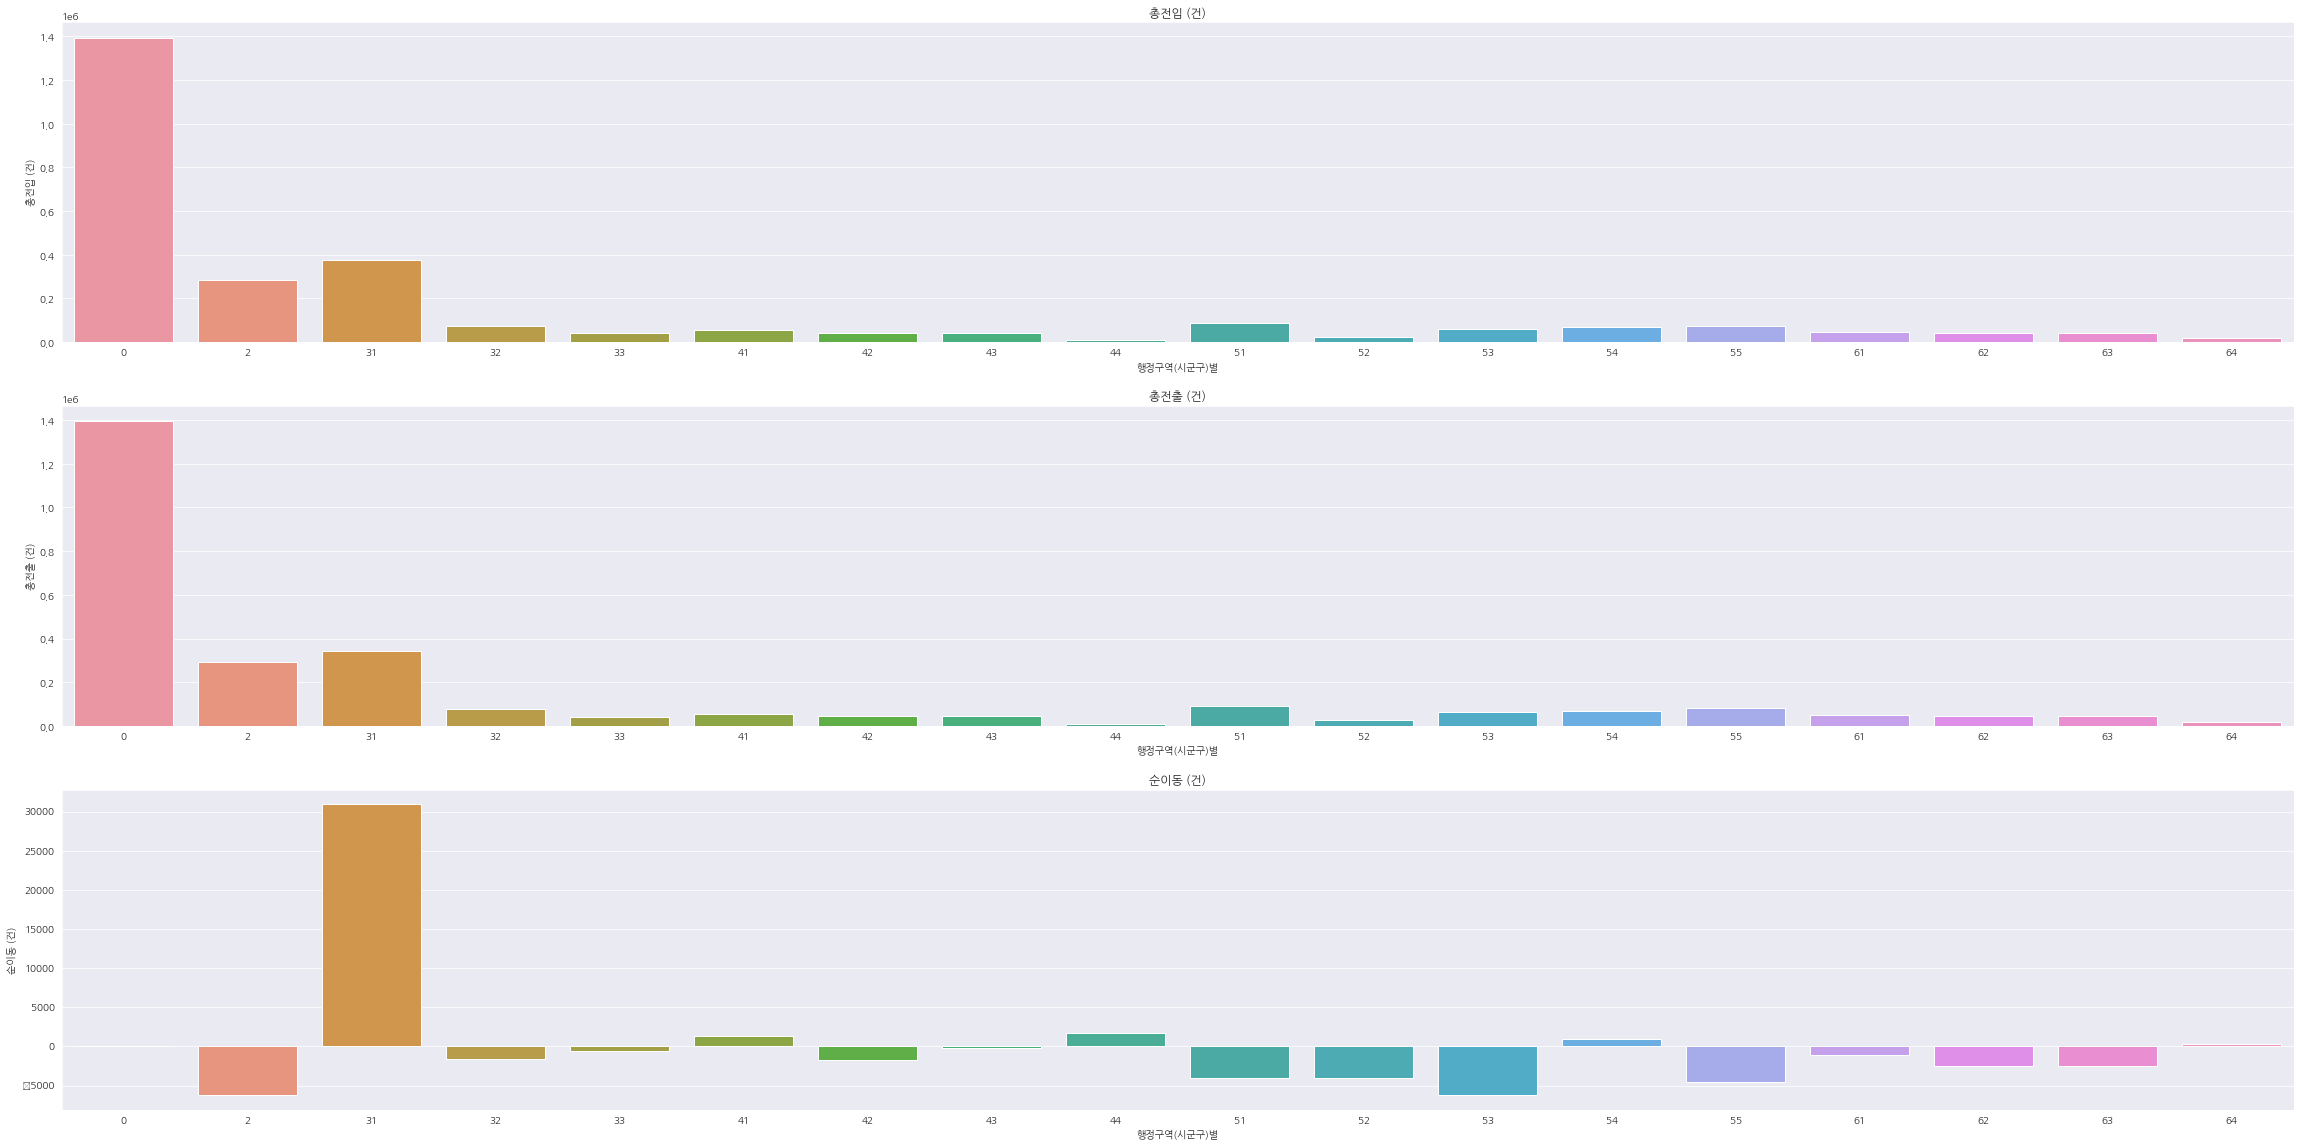

In [122]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'NanumGothic'
figure, ((ax1), (ax2), (ax3)) =plt.subplots(nrows=3,ncols=1)
figure.set_size_inches(40,20)
plt.rcParams['font.family'] = 'NanumGothic'

sns.barplot(data=a, x="행정구역(시군구)별", y="총전입 (건)", ax=ax1)
'\n'
sns.barplot(data=a, x="행정구역(시군구)별", y="총전출 (건)", ax=ax2)
'\n'
sns.barplot(data=a, x="행정구역(시군구)별", y="순이동 (건)", ax=ax3)

sns.set_style("darkgrid")
ax1.set(ylabel="총전입 (건)", title ="총전입 (건)")
ax2.set(ylabel="총전출 (건)", title ="총전출 (건)")
ax3.set(ylabel="순이동 (건)", title ="순이동 (건)")

-  경기도의 총 전입이 가장 많았으며, 총 전출도 경기도가 가장 많았고, 순이동의 경우 경기도가 가장 압도적이였다.

[Text(0, 0.5, '시도내-시군구간전출 (건)'), Text(0.5, 1.0, '시도내-시군구간전출 (건)')]

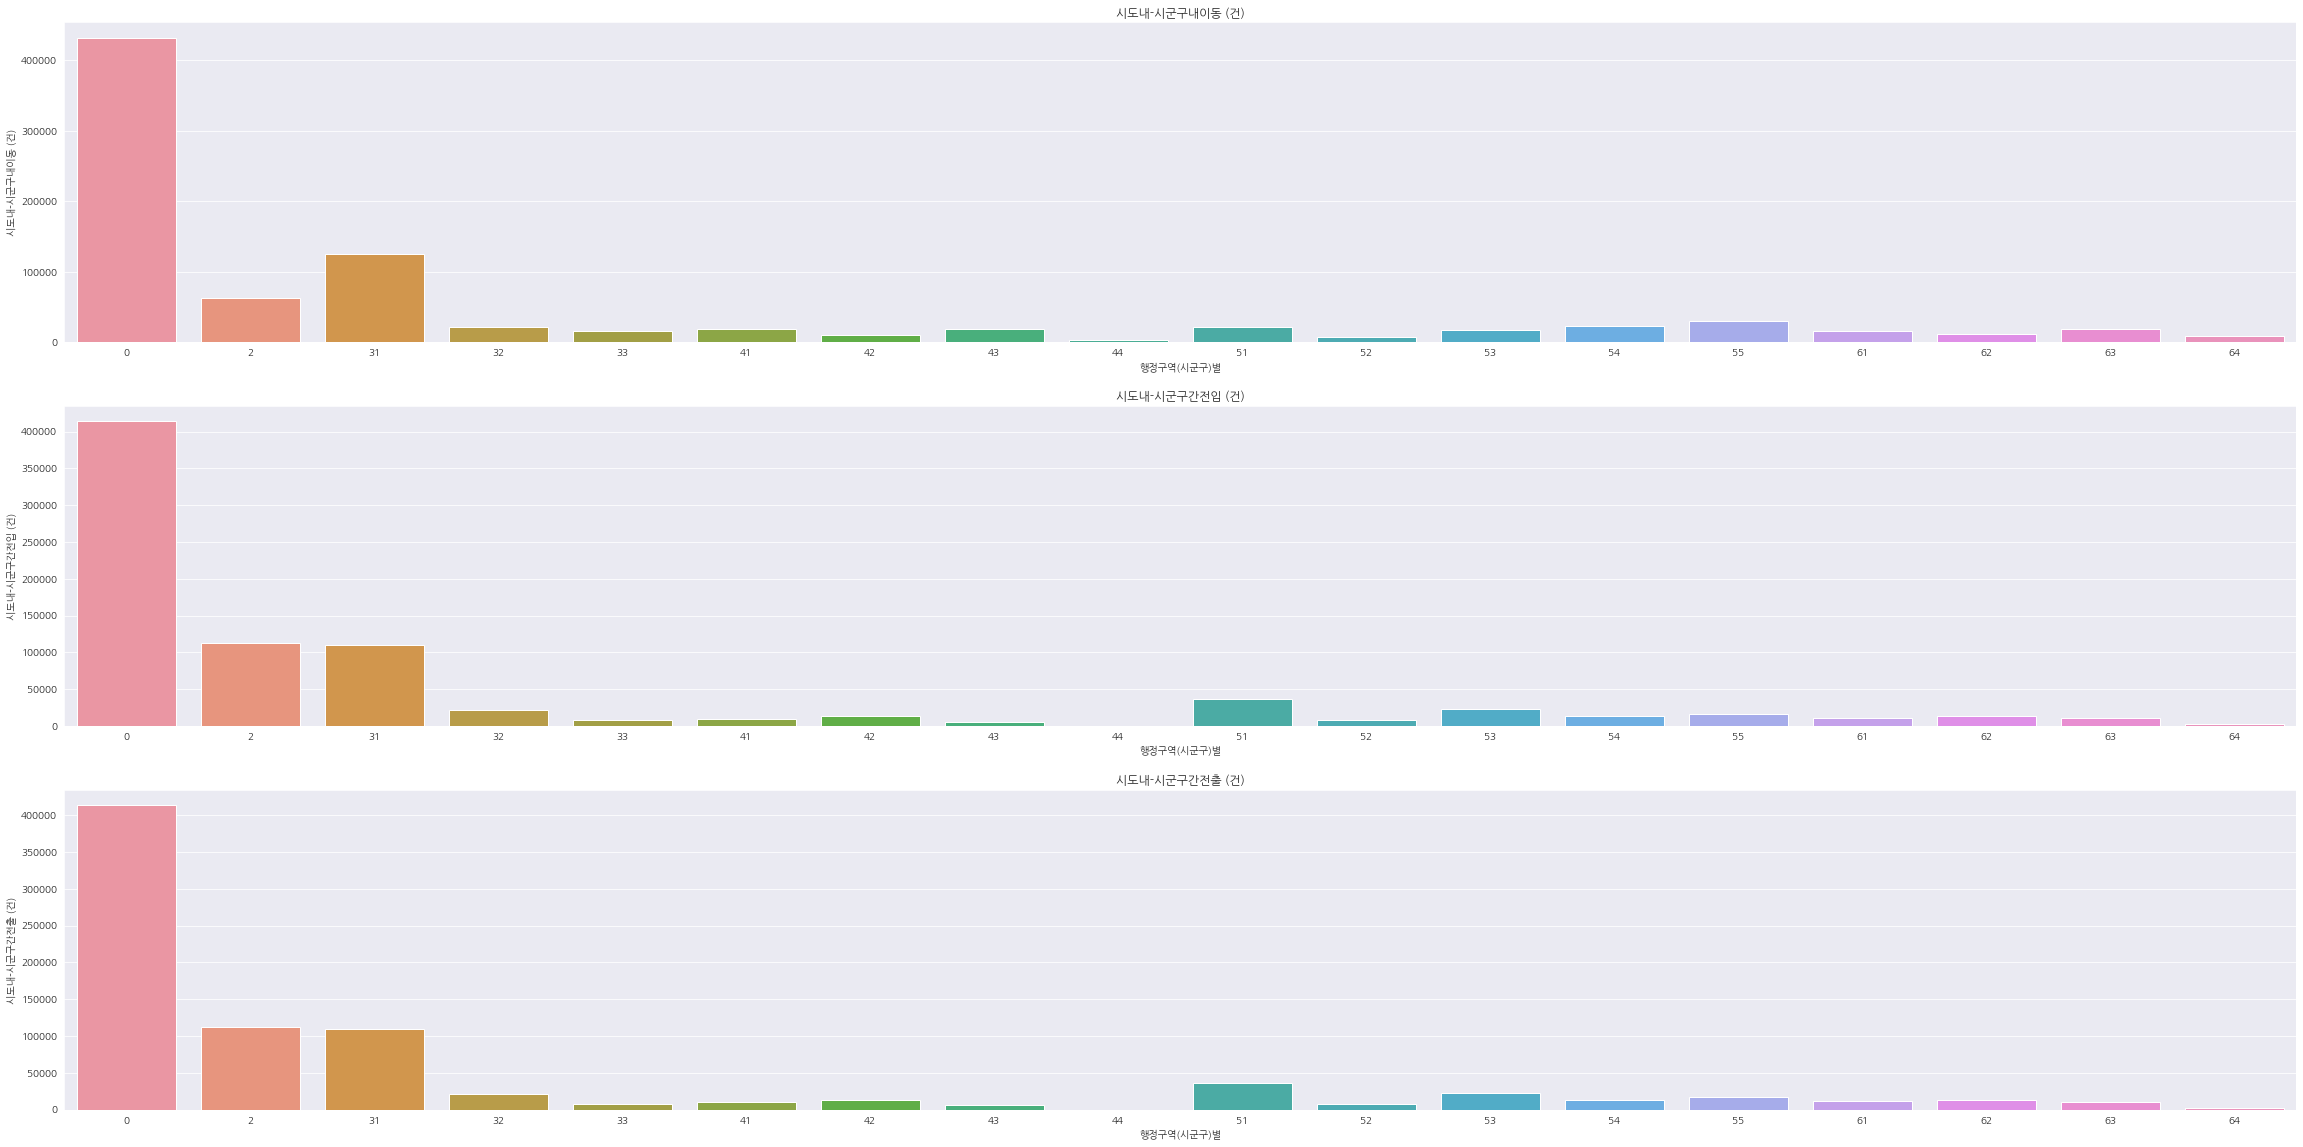

In [123]:
plt.rcParams['font.family'] = 'NanumGothic'
figure, ((ax1), (ax2), (ax3)) =plt.subplots(nrows=3,ncols=1)
figure.set_size_inches(40,20)
plt.rcParams['font.family'] = 'NanumGothic'

sns.barplot(data=a, x="행정구역(시군구)별", y="시도내-시군구내이동 (건)", ax=ax1)
'\n'
sns.barplot(data=a, x="행정구역(시군구)별", y="시도내-시군구간전입 (건)", ax=ax2)
'\n'
sns.barplot(data=a, x="행정구역(시군구)별", y="시도내-시군구간전출 (건)", ax=ax3)

sns.set_style("darkgrid")
ax1.set(ylabel="시도내-시군구내이동 (건)", title ="시도내-시군구내이동 (건)")
ax2.set(ylabel="시도내-시군구간전입 (건)", title ="시도내-시군구간전입 (건)")
ax3.set(ylabel="시도내-시군구간전출 (건)", title ="시도내-시군구간전출 (건)")

- 시도내-시군구내이동 (건)은 경기도가 가장 많았고, 시도내-시군구간전입 (건)은 서울과 경기도가 비슷했으며, 시도내-시군구간전출 (건)도 서울과 경기도가 비슷하다.

[Text(0, 0.5, '시도간전출 (건)'), Text(0.5, 1.0, '시도간전출 (건)')]

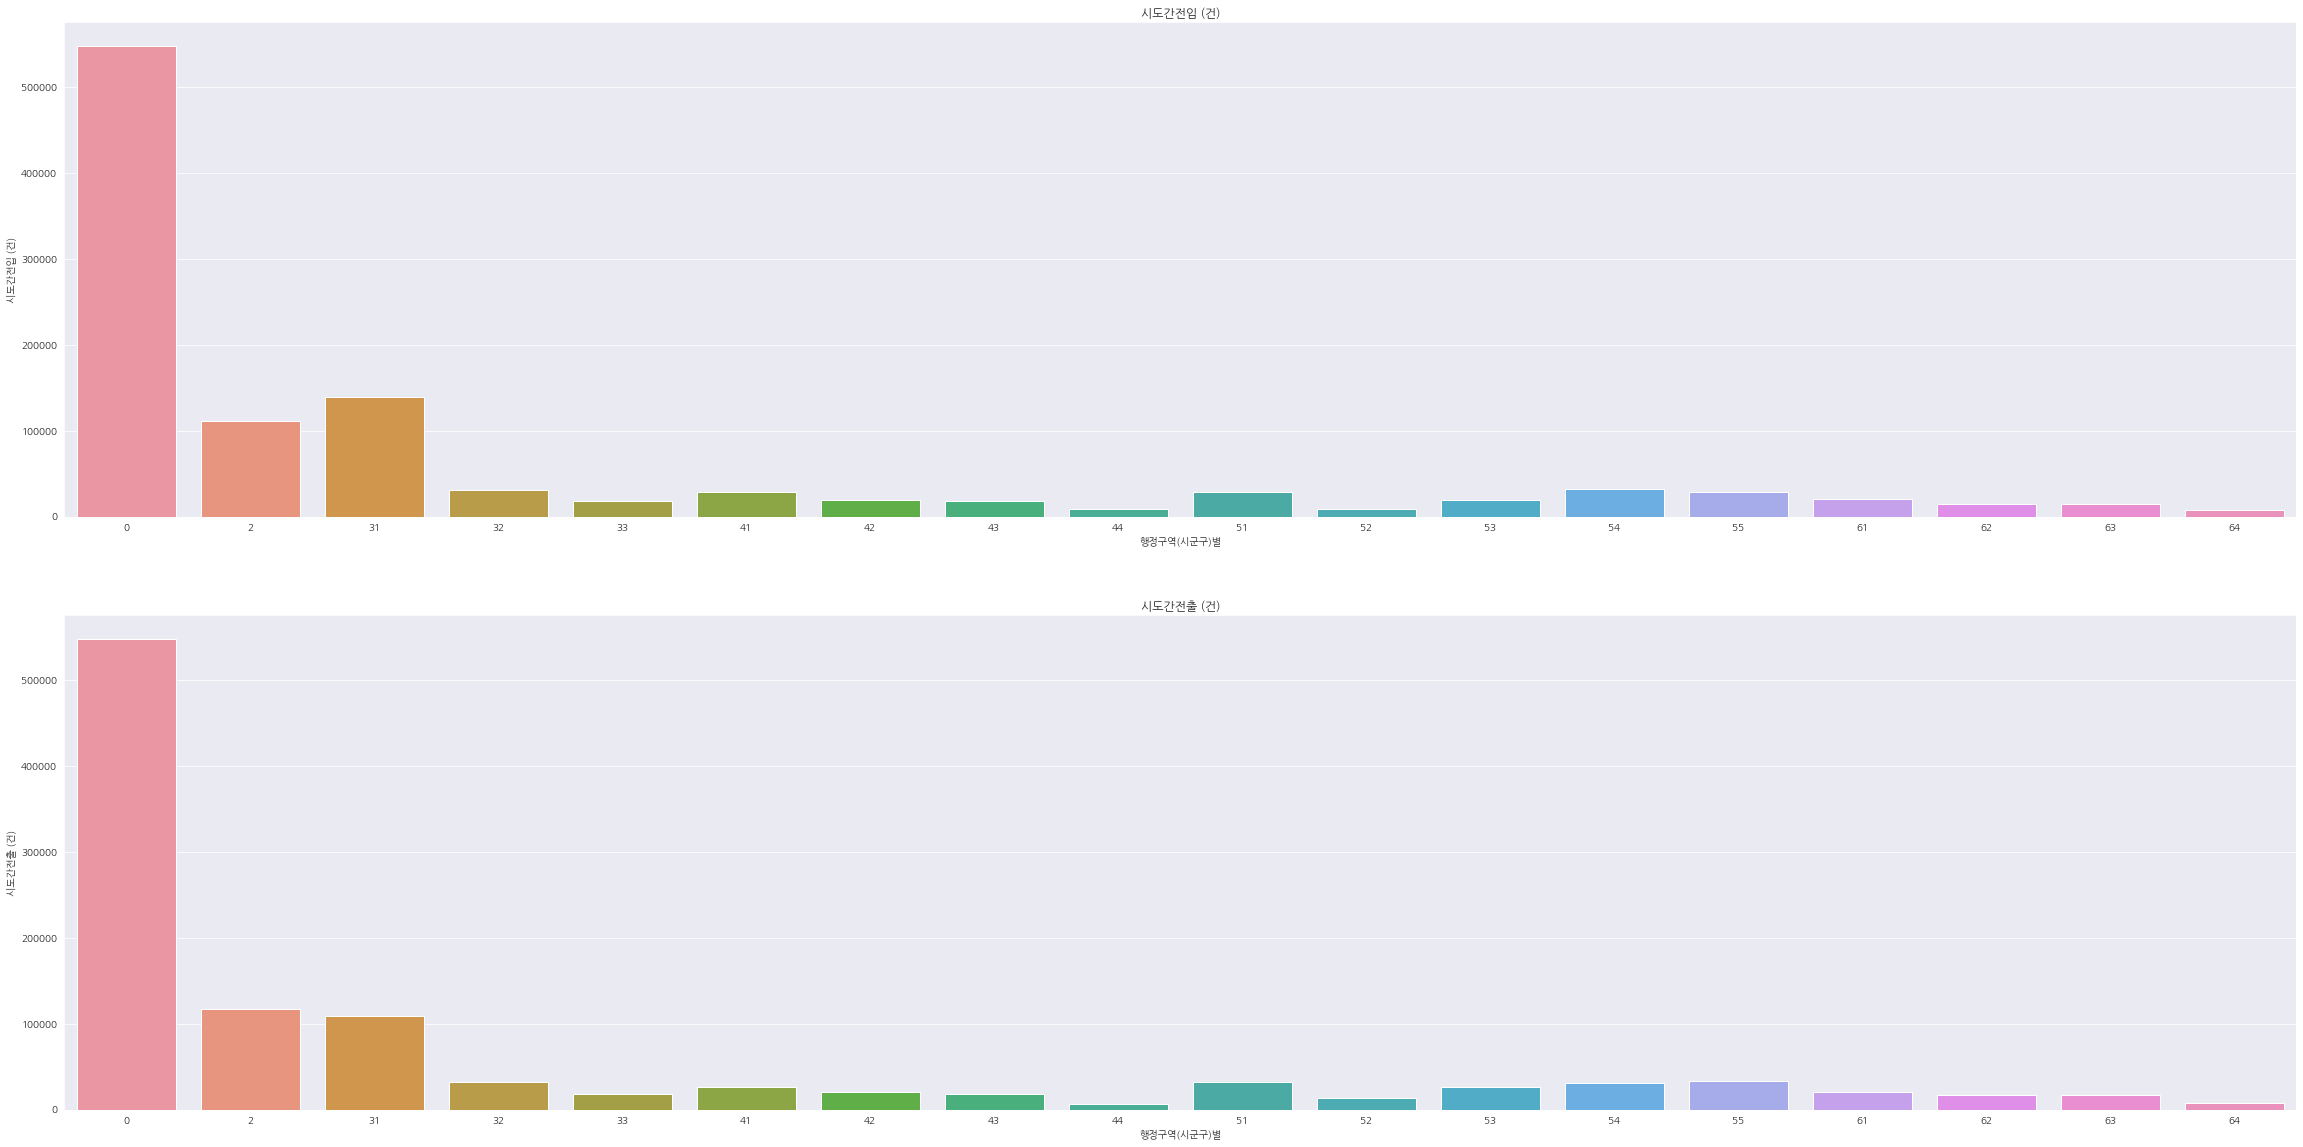

In [125]:
plt.rcParams['font.family'] = 'NanumGothic'
figure, ((ax1), (ax2)) =plt.subplots(nrows=2,ncols=1)
figure.set_size_inches(40,20)
plt.rcParams['font.family'] = 'NanumGothic'

sns.barplot(data=a, x="행정구역(시군구)별", y="시도간전입 (건)", ax=ax1)
'\n'
sns.barplot(data=a, x="행정구역(시군구)별", y="시도간전출 (건)", ax=ax2)

sns.set_style("darkgrid")
ax1.set(ylabel="시도간전입 (건)", title ="시도간전입 (건)")
ax2.set(ylabel="시도간전출 (건)", title ="시도간전출 (건)")

- 시도간 전입 (건)과 경기도가 가장 많았고, 시도간 전출 (건)은 서울이 가장 많았다.

그러나, 서울과 경기도의 인구가 전국에서 가장 많으므로, 인구대비 이동비율을 알아야 인구의 이동의 비율을 더 정확하게 알 수 있다고 생각이 듭니다.

이동규모별로 비교하여 보기
--

In [126]:
move

,행정구역(시군구)별,이동규모별,2021. 02,2021. 02.1,2021. 02.2,2021. 02.3,2021. 02.4,2021. 02.5,2021. 02.6,2021. 02.7,...,2021. 03.6,2021. 03.7,2021. 04,2021. 04.1,2021. 04.2,2021. 04.3,2021. 04.4,2021. 04.5,2021. 04.6,2021. 04.7
1,0,42,463863,463863,0,138370,139023,139023,186470,186470,...,206430,206430,414794,414794,0,136390,123149,123149,155255,155255
2,0,1,339918,339918,0,86755,101072,101072,152091,152091,...,176262,176262,315647,315647,0,88980,94520,94520,132147,132147
3,0,2,50857,50857,0,19875,15434,15434,15548,15548,...,16584,16584,47877,47877,0,20666,14126,14126,13085,13085
4,0,3,36513,36513,0,15246,11514,11514,9753,9753,...,8020,8020,28430,28430,0,14100,8363,8363,5967,5967
5,0,4,29510,29510,0,13178,8967,8967,7365,7365,...,4550,4550,18464,18464,0,10110,5034,5034,3320,3320
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,64,6,15,14,1,9,2,2,4,3,...,0,1,9,7,2,5,2,2,2,0
195,64,7,5,6,-1,5,0,0,0,1,...,1,0,2,2,0,1,0,0,1,1
196,64,8,0,0,0,0,0,0,0,0,...,0,1,1,1,0,1,0,0,0,0
197,64,9,1,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [129]:
import numpy as np
move_0=np.array(move['2021. 02'].values).reshape(-1,1)+np.array(move['2021. 03'].values).reshape(-1,1)+np.array(move['2021. 04'].values).reshape(-1,1)
move_0=pd.DataFrame(move_0, columns=['총전입 (건)'])

move_1=np.array(move['2021. 02.1'].values).reshape(-1,1)+np.array(move['2021. 03.1'].values).reshape(-1,1)+np.array(move['2021. 04.1'].values).reshape(-1,1)
move_1=pd.DataFrame(move_1,  columns=['총전출 (건)'])

move_2=np.array(move['2021. 02.2'].values).reshape(-1,1)+np.array(move['2021. 03.2'].values).reshape(-1,1)+np.array(move['2021. 04.2'].values).reshape(-1,1)
move_2=pd.DataFrame(move_2,  columns=['순이동 (건)'])

move_3=np.array(move['2021. 02.3'].values).reshape(-1,1)+np.array(move['2021. 03.3'].values).reshape(-1,1)+np.array(move['2021. 04.3'].values).reshape(-1,1)
move_3=pd.DataFrame(move_3,  columns=['시도내-시군구내이동 (건)'])

move_4=np.array(move['2021. 02.4'].values).reshape(-1,1)+np.array(move['2021. 03.4'].values).reshape(-1,1)+np.array(move['2021. 04.4'].values).reshape(-1,1)
move_4=pd.DataFrame(move_4,  columns=['시도내-시군구간전입 (건)'])

move_5=np.array(move['2021. 02.5'].values).reshape(-1,1)+np.array(move['2021. 03.5'].values).reshape(-1,1)+np.array(move['2021. 04.5'].values).reshape(-1,1)
move_5=pd.DataFrame(move_5,  columns=['시도내-시군구간전출 (건)'])

move_6=np.array(move['2021. 02.6'].values).reshape(-1,1)+np.array(move['2021. 03.6'].values).reshape(-1,1)+np.array(move['2021. 04.6'].values).reshape(-1,1)
move_6=pd.DataFrame(move_6,  columns=['시도간전입 (건)'])

move_7=np.array(move['2021. 02.7'].values).reshape(-1,1)+np.array(move['2021. 03.7'].values).reshape(-1,1)+np.array(move['2021. 04.7'].values).reshape(-1,1)
move_7=pd.DataFrame(move_7,  columns=['시도간전출 (건)'])

b=pd.concat([move_0,move_1,move_2,move_3,move_4,move_5,move_6,move_7], axis=1)

In [132]:
b['행정구역(시군구)별']=move['행정구역(시군구)별'].values
b['이동규모별']=move['이동규모별'].values
b

,총전입 (건),총전출 (건),순이동 (건),시도내-시군구내이동 (건),시도내-시군구간전입 (건),시도내-시군구간전출 (건),시도간전입 (건),시도간전출 (건),행정구역(시군구)별,이동규모별
0,463863515868414794,463863515868414794,000,138370157683136390,139023151755123149,139023151755123149,186470206430155255,186470206430155255,0,42
1,339918394568315647,339918394568315647,000,8675510171488980,10107211659294520,10107211659294520,152091176262132147,152091176262132147,0,1
2,508575807447877,508575807447877,000,198752438120666,154341710914126,154341710914126,155481658413085,155481658413085,0,2
3,365133484828430,365133484828430,000,152461652014100,11514103088363,11514103088363,975380205967,975380205967,0,3
4,295102301018464,295102301018464,000,131781210810110,896763525034,896763525034,736545503320,736545503320,0,4
...,...,...,...,...,...,...,...,...,...,...
193,1599,14107,1-12,995,202,202,402,310,64,6
194,522,612,-110,501,010,010,011,101,64,7
195,001,011,0-10,001,000,000,000,010,64,8
196,100,100,000,100,000,000,000,000,64,9


In [140]:
b.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198 entries, 0 to 197
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   총전입 (건)         198 non-null    object
 1   총전출 (건)         198 non-null    object
 2   순이동 (건)         198 non-null    object
 3   시도내-시군구내이동 (건)  198 non-null    object
 4   시도내-시군구간전입 (건)  198 non-null    object
 5   시도내-시군구간전출 (건)  198 non-null    object
 6   시도간전입 (건)       198 non-null    object
 7   시도간전출 (건)       198 non-null    object
 8   행정구역(시군구)별      198 non-null    int64 
 9   이동규모별           198 non-null    int64 
dtypes: int64(2), object(8)
memory usage: 15.6+ KB


In [144]:
b_1=b.values.astype(float)
b=pd.DataFrame(b_1, index=b.index, columns=b.columns)

ValueError: could not convert string to float: '-2753578-4044'

TypeError: The x variable is categorical, but one of ['numeric', 'datetime'] is required

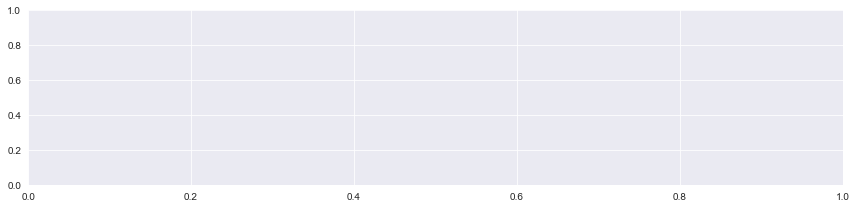

In [138]:
facet = sns.FacetGrid(b, hue ='이동규모별', aspect=4)
facet.map(sns.kdeplot,'총전입 (건)',shade = True) # kde : 이차원 밀집도 그래프
facet.set(xlim=(0,b['총전입 (건)'].max()))
facet.add_legend()
sns.axes_style('dark')

plt.show()

시간별 EDA
--

시군구별_이동건수 데이터프레임을 봤을 때, 년월 뒤의 숫자는 각각의 정보를 나타낸다. 이에 따라 2021년 2월부터 201년 4월까지로 나누어서 비교해보도록 한다.

In [24]:
move.columns

Index(['행정구역(시군구)별', '이동규모별', '2021. 02', '2021. 02.1', '2021. 02.2',
       '2021. 02.3', '2021. 02.4', '2021. 02.5', '2021. 02.6', '2021. 02.7',
       '2021. 03', '2021. 03.1', '2021. 03.2', '2021. 03.3', '2021. 03.4',
       '2021. 03.5', '2021. 03.6', '2021. 03.7', '2021. 04', '2021. 04.1',
       '2021. 04.2', '2021. 04.3', '2021. 04.4', '2021. 04.5', '2021. 04.6',
       '2021. 04.7'],
      dtype='object')

In [46]:
month_2=move.iloc[:, 2:10]
month_2

,2021. 02,2021. 02.1,2021. 02.2,2021. 02.3,2021. 02.4,2021. 02.5,2021. 02.6,2021. 02.7
0,총전입 (건),총전출 (건),순이동 (건),시도내-시군구내이동 (건),시도내-시군구간전입 (건),시도내-시군구간전출 (건),시도간전입 (건),시도간전출 (건)
1,463863,463863,0,138370,139023,139023,186470,186470
2,339918,339918,0,86755,101072,101072,152091,152091
3,50857,50857,0,19875,15434,15434,15548,15548
4,36513,36513,0,15246,11514,11514,9753,9753
...,...,...,...,...,...,...,...,...
194,15,14,1,9,2,2,4,3
195,5,6,-1,5,0,0,0,1
196,0,0,0,0,0,0,0,0
197,1,1,0,1,0,0,0,0


In [47]:
month_3=move.iloc[:, 10:18]
month_3

,2021. 03,2021. 03.1,2021. 03.2,2021. 03.3,2021. 03.4,2021. 03.5,2021. 03.6,2021. 03.7
0,총전입 (건),총전출 (건),순이동 (건),시도내-시군구내이동 (건),시도내-시군구간전입 (건),시도내-시군구간전출 (건),시도간전입 (건),시도간전출 (건)
1,515868,515868,0,157683,151755,151755,206430,206430
2,394568,394568,0,101714,116592,116592,176262,176262
3,58074,58074,0,24381,17109,17109,16584,16584
4,34848,34848,0,16520,10308,10308,8020,8020
...,...,...,...,...,...,...,...,...
194,9,10,-1,9,0,0,0,1
195,2,1,1,0,1,1,1,0
196,0,1,-1,0,0,0,0,1
197,0,0,0,0,0,0,0,0


In [48]:
month_4=move.iloc[:, 18:26]
month_4

,2021. 04,2021. 04.1,2021. 04.2,2021. 04.3,2021. 04.4,2021. 04.5,2021. 04.6,2021. 04.7
0,총전입 (건),총전출 (건),순이동 (건),시도내-시군구내이동 (건),시도내-시군구간전입 (건),시도내-시군구간전출 (건),시도간전입 (건),시도간전출 (건)
1,414794,414794,0,136390,123149,123149,155255,155255
2,315647,315647,0,88980,94520,94520,132147,132147
3,47877,47877,0,20666,14126,14126,13085,13085
4,28430,28430,0,14100,8363,8363,5967,5967
...,...,...,...,...,...,...,...,...
194,9,7,2,5,2,2,2,0
195,2,2,0,1,0,0,1,1
196,1,1,0,1,0,0,0,0
197,0,0,0,0,0,0,0,0


In [66]:
month_2.iloc[0, :]

2021. 02             총전입 (건)
2021. 02.1           총전출 (건)
2021. 02.2           순이동 (건)
2021. 02.3    시도내-시군구내이동 (건)
2021. 02.4    시도내-시군구간전입 (건)
2021. 02.5    시도내-시군구간전출 (건)
2021. 02.6         시도간전입 (건)
2021. 02.7         시도간전출 (건)
Name: 0, dtype: object

In [79]:
month_2=month_2.iloc[1:, :]
month_3=month_3.iloc[1:, :]
month_4=month_4.iloc[1:, :]

In [80]:
m2=month_2.values.astype(int)
m3=month_3.values.astype(int)
m4=month_4.values.astype(int)

In [81]:
month_2=pd.DataFrame(m2, index=month_2.index, columns=month_2.columns)
month_3=pd.DataFrame(m3, index=month_3.index, columns=month_3.columns)
month_4=pd.DataFrame(m4, index=month_4.index, columns=month_4.columns)

In [94]:
move.loc[move['행정구역(시군구)별']=='전국']

,행정구역(시군구)별,이동규모별,2021. 02,2021. 02.1,2021. 02.2,2021. 02.3,2021. 02.4,2021. 02.5,2021. 02.6,2021. 02.7,...,2021. 03.6,2021. 03.7,2021. 04,2021. 04.1,2021. 04.2,2021. 04.3,2021. 04.4,2021. 04.5,2021. 04.6,2021. 04.7
1,전국,계,463863,463863,0,138370,139023,139023,186470,186470,...,206430,206430,414794,414794,0,136390,123149,123149,155255,155255
2,전국,1인,339918,339918,0,86755,101072,101072,152091,152091,...,176262,176262,315647,315647,0,88980,94520,94520,132147,132147
3,전국,2인,50857,50857,0,19875,15434,15434,15548,15548,...,16584,16584,47877,47877,0,20666,14126,14126,13085,13085
4,전국,3인,36513,36513,0,15246,11514,11514,9753,9753,...,8020,8020,28430,28430,0,14100,8363,8363,5967,5967
5,전국,4인,29510,29510,0,13178,8967,8967,7365,7365,...,4550,4550,18464,18464,0,10110,5034,5034,3320,3320
6,전국,5인,6069,6069,0,2839,1732,1732,1498,1498,...,859,859,3661,3661,0,2113,922,922,626,626
7,전국,6인,815,815,0,391,248,248,176,176,...,119,119,556,556,0,319,148,148,89,89
8,전국,7인,132,132,0,63,42,42,27,27,...,27,27,108,108,0,66,28,28,14,14
9,전국,8인,27,27,0,12,7,7,8,8,...,6,6,30,30,0,20,5,5,5,5
10,전국,9인,13,13,0,8,3,3,2,2,...,1,1,11,11,0,9,1,1,1,1


In [99]:
move

,행정구역(시군구)별,이동규모별,2021. 02,2021. 02.1,2021. 02.2,2021. 02.3,2021. 02.4,2021. 02.5,2021. 02.6,2021. 02.7,...,2021. 03.6,2021. 03.7,2021. 04,2021. 04.1,2021. 04.2,2021. 04.3,2021. 04.4,2021. 04.5,2021. 04.6,2021. 04.7
0,행정구역(시군구)별,이동규모별,총전입 (건),총전출 (건),순이동 (건),시도내-시군구내이동 (건),시도내-시군구간전입 (건),시도내-시군구간전출 (건),시도간전입 (건),시도간전출 (건),...,시도간전입 (건),시도간전출 (건),총전입 (건),총전출 (건),순이동 (건),시도내-시군구내이동 (건),시도내-시군구간전입 (건),시도내-시군구간전출 (건),시도간전입 (건),시도간전출 (건)
1,전국,계,463863,463863,0,138370,139023,139023,186470,186470,...,206430,206430,414794,414794,0,136390,123149,123149,155255,155255
2,전국,1인,339918,339918,0,86755,101072,101072,152091,152091,...,176262,176262,315647,315647,0,88980,94520,94520,132147,132147
3,전국,2인,50857,50857,0,19875,15434,15434,15548,15548,...,16584,16584,47877,47877,0,20666,14126,14126,13085,13085
4,전국,3인,36513,36513,0,15246,11514,11514,9753,9753,...,8020,8020,28430,28430,0,14100,8363,8363,5967,5967
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,제주특별자치도,6인,15,14,1,9,2,2,4,3,...,0,1,9,7,2,5,2,2,2,0
195,제주특별자치도,7인,5,6,-1,5,0,0,0,1,...,1,0,2,2,0,1,0,0,1,1
196,제주특별자치도,8인,0,0,0,0,0,0,0,0,...,0,1,1,1,0,1,0,0,0,0
197,제주특별자치도,9인,1,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [100]:
from sklearn import preprocessing

le=preprocessing.LabelEncoder()

encoded=le.fit_transform(move['행정구역(시군구)별'])
np=encoded.reshape(-1,1)
loc_1=map(lambda x: x[0], np)
loc=pd.Series(loc_1)

move['행정구역(시군구)별']=loc